Данное задание основано на материалах секции, посвященной оптимизационным задачам и методам их решения. Вам понадобится компьютер с установленным интерпретатором Python и подключенными библиотеками NumPy, SciPy и Matplotlib.

**Вы научитесь:**

1. применять библиотеку SciPy для минимизации функций
2. делать выбор между градиентными и неградиентными методами оптимизации, исходя из особенностей задачи и ваших пожеланий к итоговому решению

**Введение**

В этом задании вы научитесь решать задачи оптимизации с помощью библиотеки SciPy. Сначала вы решите задачу поиска минимума функции с помощью одного из градиентных методов оптимизации, затем увидите отличия в работе градиентного метода и одного из методов глобальной оптимизации, а в заключение – найдете глобальный минимум негладкой функции, т.е. функции, у которой не всегда определен градиент.

Понимание задачи глобальной оптимизации и отличий градиентных методов, от методов, не использующих градиент, очень полезно в задачах анализа данных, в частности, для подбора параметров алгоритмов.

**Материалы**

1. Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html
2. Matplotlib User Guide: http://matplotlib.org/users/index.html

**Инструкция по выполнению**

Данное задание состоит из трех частей. В каждой ответом будет набор чисел, который вам нужно будет набрать через пробел в текстовом файле и загрузить. _Десятичные дроби записывайте через точку._

### Задача 1. Минимизация гладкой функции

#### 1.Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

#### 2. В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.

#### 3.Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

In [10]:
%matplotlib inline
import numpy as np
import math
from scipy import linalg
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [32]:
def f(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(-x / 2.0)

#### 4.Изучите примеры использования scipy.optimize.minimize в документации Scipy (см. "Материалы")
1. Справка по функциям пакета scipy.optimize: http://docs.scipy.org/doc/scipy/reference/optimize.html

#### 5.Попробуйте найти минимум, используя стандартные параметры в функции scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

_Ниже мы видим что при различных начальных приближениях x0, результат оказывается одинаковым_


In [16]:
minimize(f, x0=1) # по умолчанию используется метод оптимизации
                  # Недлера-Мида(метод амёбы)

      fun: 1.7452682903319905
 hess_inv: array([[ 6.02525335]])
      jac: array([ -7.45058060e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([ 4.13628823])

In [45]:
minimize(f, x0=11)

      fun: -11.898894665981311
 hess_inv: array([[ 123.27588322]])
      jac: array([ -1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 51
      nit: 2
     njev: 17
   status: 0
  success: True
        x: array([ 25.88019285])

In [37]:
minimize(f, x0=20)

      fun: -11.898894665981189
 hess_inv: array([[ 1.68395095]])
      jac: array([  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 7
     njev: 9
   status: 0
  success: True
        x: array([ 25.8801937])

####  6. Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

In [63]:
res_min1 = minimize(f, x0=2, method="BFGS")
print res_min1
print res_min1.fun

      fun: 1.7452682903449388
 hess_inv: array([[ 5.98752437]])
      jac: array([ -2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 4.13627618])
1.74526829034


In [48]:
answers1 = []
answers1.append(round(res_min1.fun, 2))# round 1.7452682903449388

In [56]:
print answers1

[1.75, -11.9]


#### 7.Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [64]:
res_min2 = minimize(f, x0=30, method="BFGS")
print res_min2
print res_min2.fun

      fun: -11.898894665981265
 hess_inv: array([[ 1.67840334]])
      jac: array([  1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([ 25.88019347])
-11.898894666


In [49]:
answers1.append(round(res_min2.fun, 2)) # round -11.898894665981265

In [50]:
answers1

[1.75, -11.9]

In [28]:
ans1 = " ".join(map(str, answers1))
print ans1

4.14 25.88


In [29]:
file_obj = open('ans1.txt', 'w')
file_obj.write(ans1)
file_obj.close()

#### 8. Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

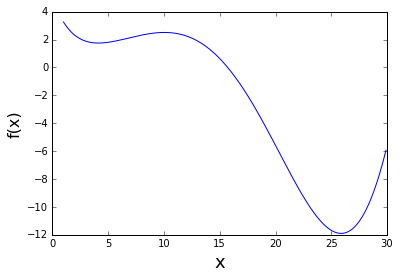

In [58]:
# На графике видны два минимума функций как раз в точках 1.75 и -11.9
x = np.arange(1., 30., 0.1)
plt.plot(x, f(x))
plt.xlabel('x', fontsize=18)
plt.ylabel('f(x)', fontsize=16)
plt.show()

## Задача 2. Глобальная оптимизация

1. Теперь попробуем применить к той же функции f(x) метод глобальной оптимизации — дифференциальную эволюцию.
2. Изучите документацию и примеры использования функции [scipy.optimize.differential_evolution](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.differential_evolution.html)
3. Обратите внимание, что границы значений аргументов функции представляют собой список кортежей (list, в который помещены объекты типа tuple). Даже если у вас функция одного аргумента, возьмите границы его значений в квадратные скобки, чтобы передавать в этом параметре список из одного кортежа, т.к. в реализации scipy.optimize.differential_evolution длина этого списка используется чтобы определить количество аргументов функции.

#### 4.Запустите поиск минимума функции f(x) с помощью дифференциальной эволюции на промежутке [1, 30]. Полученное значение функции в точке минимума - ответ в задаче 2. Запишите его с точностью до второго знака после запятой. В этой задаче ответ - только одно число.

In [66]:
from scipy.optimize import differential_evolution

In [68]:
res_dif_evo = differential_evolution(f, bounds=[(1, 30)])
print res_dif_evo
print res_dif_evo.fun

     fun: array([-11.89889467])
     jac: array([  8.88178420e-06])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([ 25.88020776])
[-11.89889467]


In [70]:
ans2 = str(round(res_dif_evo.fun, 2))
print ans2

-11.9


In [71]:
file_obj = open('ans2.txt', 'w')
file_obj.write(ans2)
file_obj.close()

#### 5.Заметьте, дифференциальная эволюция справилась с задачей поиска глобального минимума на отрезке, т.к. по своему устройству она предполагает борьбу с попаданием в локальные минимумы.

#### 6. Сравните количество итераций, потребовавшихся BFGS для нахождения минимума при хорошем начальном приближении, с количеством итераций, потребовавшихся дифференциальной эволюции. При повторных запусках дифференциальной эволюции количество итераций будет меняться, но в этом примере, скорее всего, оно всегда будет сравнимым с количеством итераций BFGS. Однако в дифференциальной эволюции за одну итерацию требуется выполнить гораздо больше действий, чем в BFGS. Например, можно обратить внимание на количество вычислений значения функции (nfev) и увидеть, что у BFGS оно значительно меньше. Кроме того, время работы дифференциальной эволюции очень быстро растет с увеличением числа аргументов функции.

## Задача 3. Минимизация негладкой функции

#### 1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.

In [81]:
def h(x):
    return np.trunc(f(x)) # np.trunc helps to deal with scalar, list and other type of inputs, 
                          # whereas int will throw an error when dealing wiht values others than scalar
                          # such as TypeError: only length-1 arrays can be converted to Python scalars  

In [80]:
?np.trunc

#### 2. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.

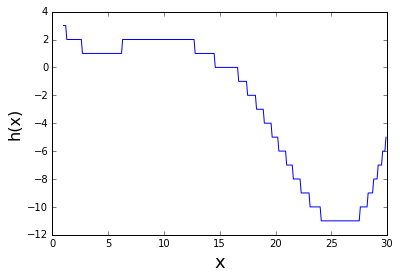

In [79]:
x = np.arange(1., 30., 0.1)
plt.plot(x, h(x))
plt.xlabel('x', fontsize=18)
plt.ylabel('h(x)', fontsize=16)
plt.show()

#### 3. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.

In [82]:
res_h_x1 = minimize(h, x0=30, method="BFGS")
print res_h_x1
print res_h_x1.fun

      fun: array([-5.])
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 30.])
[-5.]


In [84]:
answer3 = []

In [86]:
answer3.append(round(res_h_x1.fun, 2))

In [87]:
print answer3

[-5.0]


#### 4. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.

In [88]:
res_h_x2 = differential_evolution(h, bounds=[(1, 30)])
print res_h_x2
print res_h_x2.fun

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 4
 success: True
       x: array([ 26.07304867])
-11.0


In [89]:
answer3.append(round(res_h_x2.fun, 2))

In [90]:
print answer3

[-5.0, -11.0]


In [91]:
ans3 = " ".join(map(str, answer3))
print ans3

-5.0 -11.0


In [95]:
file_obj = open('ans3.txt', 'w')
file_obj.write("-5.0 -11.0")
file_obj.close()

#### 5. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).

#### 6. Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.